# Imports

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Preprocessing data

In [2]:
dataset = pd.read_csv("drive/MyDrive/smoking_driking_dataset_Ver01.csv")
dataset.info()

In [4]:
dataset = dataset.drop_duplicates()
dataset.replace({'sex': {'Male': 0, 'Female': 1}}, inplace = True)
dataset.replace({'DRK_YN':{'N': 0, 'Y': 1}}, inplace = True)

In [7]:
X = dataset.iloc[:, :23]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = \
train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def plot_conf_mat(y_test, y_pred):
    fig, ax = plt.subplots()
    ax=sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

def predictor(model_name):
    model_name.fit(X_train,y_train)
    y_pred_test = model_name.predict(X_test)
    print(metrics.classification_report(y_test, y_pred_test))
    plot_conf_mat(y_test, y_pred_test)

In [12]:
from sklearn.metrics import accuracy_score

def accuracy(model, data, labels):

    predictions = model.predict(data)
    acc = accuracy_score(labels, predictions)

    return acc

# Классификация


## Bagging

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_classifier = BaggingClassifier(
      DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5, max_features=0.5, bootstrap=False
)

bag_classifier.fit(X_train, y_train)
accuracy(bag_classifier, X_train, y_train)

0.9593846011955199

## Boosting

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(
                        n_estimators=500,
                        learning_rate=0.8,
                        random_state=42,
                        max_depth=2)

grad_boost_clf.fit(X_train, y_train)
accuracy(grad_boost_clf, X_train, y_train)

0.7419530092632622

In [15]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
    n_estimators=300,
    learning_rate=0.5
)

adaboost_clf.fit(X_train, y_train)
accuracy(adaboost_clf, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7419717433033012

In [16]:
# XGBoost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
accuracy(xgb_clf, X_train, y_train)

0.7487822873974671

## Decision Trees

              precision    recall  f1-score   support

           0       0.65      0.64      0.65    148769
           1       0.65      0.65      0.65    148627

    accuracy                           0.65    297396
   macro avg       0.65      0.65      0.65    297396
weighted avg       0.65      0.65      0.65    297396



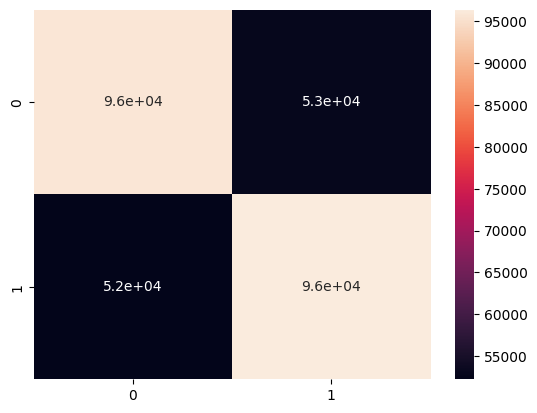

In [ ]:
dt = DecisionTreeClassifier()
predictor(dt)

## SVM

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.72      0.73      0.73    148769
           1       0.73      0.72      0.72    148627

    accuracy                           0.72    297396
   macro avg       0.72      0.72      0.72    297396
weighted avg       0.72      0.72      0.72    297396



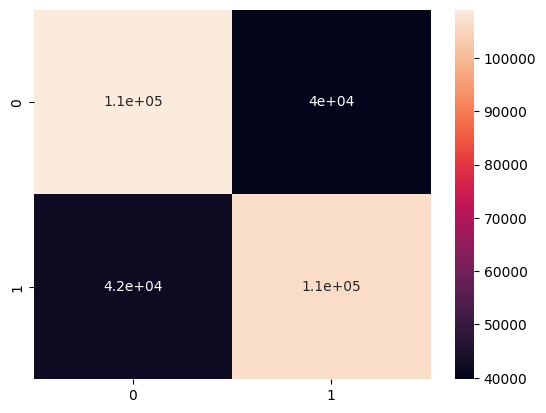

In [ ]:
svc = svm.LinearSVC(max_iter = 1000)
predictor(svc)

## MLP

              precision    recall  f1-score   support

           0       0.75      0.72      0.73    148769
           1       0.73      0.75      0.74    148627

    accuracy                           0.74    297396
   macro avg       0.74      0.74      0.74    297396
weighted avg       0.74      0.74      0.74    297396



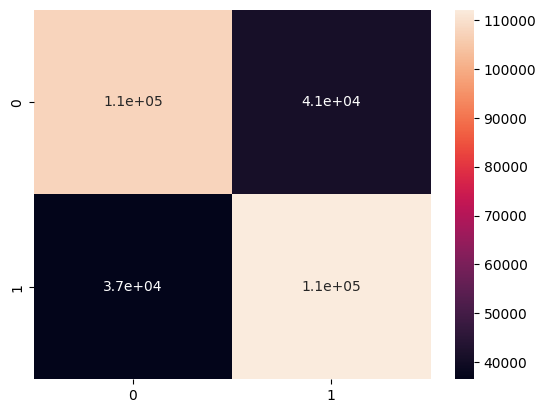

In [ ]:
mlp = MLPClassifier(random_state=1, max_iter=300)
predictor(mlp)